In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gr_Colorado = pd.read_csv("../data/groundwater_data/USGS_ColoradoSprings/WATERLEVEL.csv")
gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Rio_Grande/WATERLEVEL.csv"))
gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Ogallala_Colorado/WATERLEVEL.csv"))

gr_Colorado_filtered = gr_Colorado[gr_Colorado['Original Value'] < 2000]
gr_Colorado_filtered.drop_duplicates()
gr_Colorado_filtered['mean'] = gr_Colorado_filtered.groupby("Time")['Original Value'].transform('mean')
gr_Colorado_filtered = gr_Colorado_filtered[gr_Colorado_filtered['Original Value'].ne(gr_Colorado_filtered['Original Value'].shift())]
gr_Colorado_filtered
gr_Colorado_filtered = gr_Colorado_filtered.sort_values(by='Time', ascending=True)
gr_Colorado_filtered.index = pd.to_datetime(gr_Colorado_filtered["Time"])

C:\Users\aaron\AppData\Local\Temp\ipykernel_4812\2071117791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Rio_Grande/WATERLEVEL.csv"))
C:\Users\aaron\AppData\Local\Temp\ipykernel_4812\2071117791.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Ogallala_Colorado/WATERLEVEL.csv"))
C:\Users\aaron\AppData\Local\Temp\ipykernel_4812\2071117791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_Colorado_filtered['mean'] = gr_Colorado_filtered.g

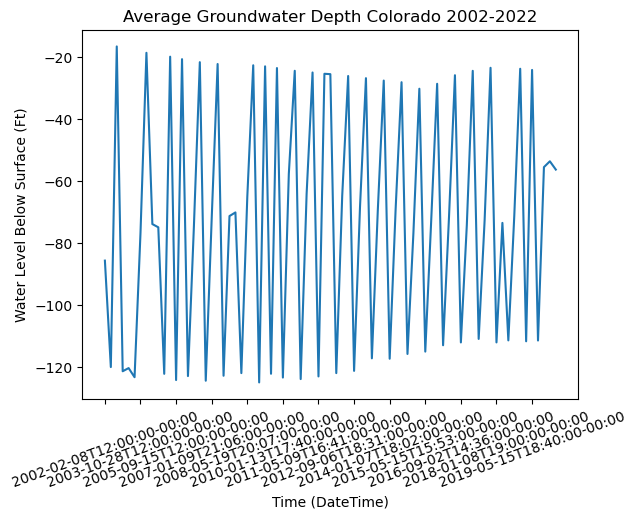

In [3]:
fig = plt.plot(gr_Colorado_filtered["Time"][::4], - gr_Colorado_filtered["Original Value"][::4])
plt.xticks(gr_Colorado_filtered["Time"][::24],rotation=20)
plt.title("Average Groundwater Depth Colorado 2002-2022")
plt.xlabel("Time (DateTime)")
plt.ylabel("Water Level Below Surface (Ft)")
plt.savefig("../Colorado_GWL_2002-2022", bbox_inches = 'tight')